# Set of Experiments
Goals: minimizing latency and maximizing benchmark performance, while using lightweight components where possible. 

 

## ⚙️ General Implementation Setup 

Environment: Python 3.10+, TensorFlow/Keras or PyTorch, scikit-learn, HuggingFace Transformers, DeepFace, OpenSMILE, librosa. 

Evaluation Split: Stratified Shuffle Split (70% train, 30% test). 

Metrics Across All Tasks: 
- Accuracy 
- F1-Score (macro): Handles emotion class imbalance. 
- Latency (ms/sample or s/batch) 
- Model Size (MB) 
- Confusion Matrix for qualitative insights. 


 Datasets: RAVDESS, EmoDB, TESS (CREMA-D optional; map to shared label space) 

Labels: Anger, Disgust, Fear, Happiness, Sadness, Surprise, Neutral





/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/sofiafernandes/.cache/kagglehub/datasets/piyushagni5/berlin-database-of-emotional-speech-emodb/versions/1
Path to dataset files: /Users/sofiafernandes/.cache/kagglehub/datasets/uwrfkaggler/ravdess-emotional-speech-audio/versions/1
['Actor_16', 'Actor_11', 'Actor_18', 'Actor_20', 'Actor_21', 'Actor_19', 'Actor_10', 'Actor_17', 'Actor_04', 'Actor_03', 'Actor_02', 'Actor_05', 'audio_speech_actors_01-24', 'Actor_12', 'Actor_15', 'Actor_23', 'Actor_24', 'Actor_22', 'Actor_14', 'Actor_13', 'Actor_09', 'Actor_07', 'Actor_06', 'Actor_01', 'Actor_08']
Path to dataset files: /Users/sofiafernandes/.cache/kagglehub/datasets/ejlok1/toronto-emotional-speech-set-tess/versions/1
['TESS']
['YAF_disgust', 'OAF_Pleasant_surprise', 'OAF_happy', 'YAF_sad', 'YAF_happy', 'YAF_neutral', 'OAF_Fear', 'OAF_angry', 'YAF_pleasant_surprised', 'YAF_fear', 'OAF_neutral', 'OAF_disgust', 'YAF_angry', 'OAF_Sad']


<Axes: title={'center': 'Emotion Distribution'}, xlabel='label'>

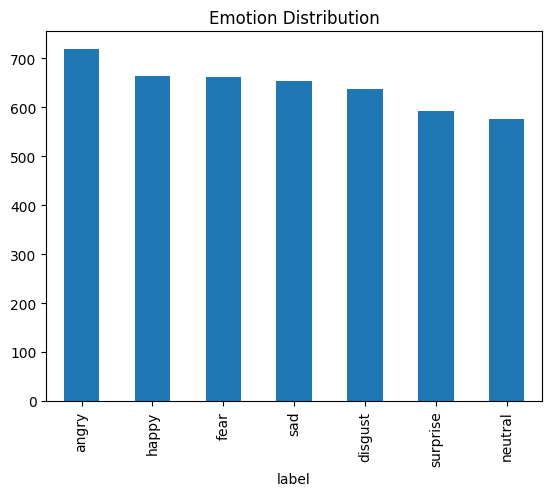

In [1]:
import sys
import os
# insert the path to the source code directory
module_path = os.path.abspath(os.path.join('..', '..')) 
sys.path.insert(0, module_path)

from src.utils import load_emodb, load_ravdess, load_tess, load_crema_d, filter_emotions

import numpy as np
import pandas as pd

emodb = filter_emotions(load_emodb())
ravdess = filter_emotions(load_ravdess())
tess = filter_emotions(load_tess())
#crema = filter_emotions(load_crema_d())

# add a dataset column to each dataset
emodb['dataset'] = 'emodb'
ravdess['dataset'] = 'ravdess'
tess['dataset'] = 'tess'
#crema['dataset'] = 'crema'

# concatenate all datasets
df = pd.concat([emodb, ravdess, tess], ignore_index=True)
# shuffle the dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)


# save the dataset to a csv file
output_file = 'combined_emotion_dataset.csv'
df.to_csv(output_file, index=False)

# plot the distribution of emotions
df['label'].value_counts().plot(kind='bar', title='Emotion Distribution')

In [102]:
load_emodb()['label'].value_counts()

Path to dataset files: /Users/sofiafernandes/.cache/kagglehub/datasets/piyushagni5/berlin-database-of-emotional-speech-emodb/versions/1


label
angry      127
boredom     81
neutral     79
happy       71
fear        69
sad         62
disgust     46
Name: count, dtype: int64

In [103]:
# OpenSMILE feature extraction
# https://audeering.github.io/opensmile-python/
#!pip install opensmile

import opensmile

def extract_features_opensmile():
    """ Extract features from the individual datasets using OpenSMILE.
    This function processes the EMO-DB, RAVDESS, TESS, and CREMA-D datasets
    and saves the extracted features to CSV files.
    """
    # Load data and extract features
    smile = opensmile.Smile(
        feature_set=opensmile.FeatureSet.GeMAPSv01b,
        #feature_set=opensmile.FeatureSet.eGeMAPSv02,
        feature_level=opensmile.FeatureLevel.Functionals,
    )

    feats_emodb = smile.process_files(emodb["filename"])
    feats_emodb.to_csv('emodb_features.csv', index=False)

    feats_ravdess = smile.process_files(ravdess["filename"])
    feats_ravdess.to_csv('ravdess_features.csv', index=False)

    feats_tess = smile.process_files(tess["filename"])
    feats_tess.to_csv('tess_features.csv', index=False)

    #feats_crema = smile.process_files(crema["filename"])
    #feats_crema.to_csv('crema_features.csv', index=False)

#extract_features_opensmile()
feats_df = pd.read_csv('combined_df_features.csv')
feats_emodb = pd.read_csv('emodb_features.csv')
feats_ravdess = pd.read_csv('ravdess_features.csv')
feats_tess = pd.read_csv('tess_features.csv')
#feats_crema = pd.read_csv('crema_features.csv')

In [104]:


# Load data and extract features
smile = opensmile.Smile(
    feature_set=opensmile.FeatureSet.GeMAPSv01b,
    #feature_set=opensmile.FeatureSet.eGeMAPSv02,
    feature_level=opensmile.FeatureLevel.Functionals,
)

#feats_df = smile.process_files(df["filename"])
feats_df = pd.read_csv('combined_df_features.csv')
# save the features to a csv file
#feats_df.to_csv('combined_df_features.csv', index=False)

feats_df.head()

,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,...,alphaRatioUV_sma3nz_amean,hammarbergIndexUV_sma3nz_amean,slopeUV0-500_sma3nz_amean,slopeUV500-1500_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength
0,35.420020,0.122371,31.292658,35.643230,39.118300,7.825643,35.614376,50.453495,41.440994,15.520793,...,-1.117758,11.999436,0.022039,0.010847,1.803607,1.012146,0.302000,0.268805,0.553333,0.414796
1,41.707138,0.075898,39.588448,41.946426,43.430430,3.841984,70.114395,76.713730,49.860855,54.977875,...,4.990377,1.049555,-0.013456,-0.001773,3.296703,1.694915,0.360000,0.231517,0.203333,0.016997
2,40.058247,0.045866,38.880238,39.709380,41.036660,2.156422,139.598180,143.688550,58.721115,68.797100,...,-14.412024,23.928312,-0.061213,-0.003443,2.547771,1.315789,0.470000,0.220000,0.176667,0.040277
3,42.324272,0.074393,40.107723,41.854042,45.533787,5.426063,88.594280,43.917896,26.804290,30.962640,...,-3.610666,11.166558,-0.052942,-0.001891,2.453988,1.273885,0.420000,0.180000,0.226667,0.144299
4,34.454590,0.087642,31.992432,33.751865,37.750618,5.758186,107.164050,149.074230,20.824293,2.724423,...,-7.613103,15.695953,0.061815,0.002180,1.881720,0.817439,0.486667,0.145220,0.535000,0.438891


## 🔊 4.4.1 Speech Emotion Recognition (SER) 

### Experiment 1.1 – SVM Parameter Tuning 

Features: 
- OpenSMILE GeMAPS 
- librosa: MFCCs, chroma, pitch 

Grid Search Params: 

C: [0.1, 1, 10], kernel: [‘linear’, ‘rbf’], gamma: [0.01, 0.1, 1] 

Metrics: Accuracy, F1-macro, Latency (time to predict full test set) 


In [105]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from joblib import dump, load

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', SelectKBest(f_classif, k=20)),  # Or whatever method you use
    ('svm', SVC(kernel='linear', C=1.0, probability=True))
])

# Fit the model
X = feats_df
y = df['label']
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selection', SelectKBest(k=20)),
                ('svm', SVC(kernel='linear', probability=True))])

In [99]:
# perform grid search for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
param_grid = {
    'svm__C': [0.1, 1.0, 10.0],
    'svm__gamma': ['scale'], #'auto'],
    'svm__kernel': ['rbf'], #['linear', 'rbf'],
    'feature_selection__k': [30, 40, 50] #[10, 20, 30]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Save the best model
best_model = grid_search.best_estimator_
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)
dump(best_model, 'ser_svm_model.joblib')

Best parameters found:  {'feature_selection__k': 40, 'svm__C': 10.0, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
Best cross-validation score:  0.858142455294354


['ser_svm_model.joblib']

Best parameters found:  {'feature_selection__k': 30, 'svm__C': 10.0, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
Best cross-validation score:  0.8454446205317838

              precision    recall  f1-score   support

       angry       0.88      0.92      0.90       216
     disgust       0.87      0.85      0.86       191
        fear       0.88      0.87      0.88       198
       happy       0.79      0.80      0.80       199
     neutral       0.96      0.91      0.94       173
         sad       0.91      0.87      0.89       196
    surprise       0.89      0.92      0.90       178

    accuracy                           0.88      1351
   macro avg       0.88      0.88      0.88      1351
weighted avg       0.88      0.88      0.88      1351

Accuracy: 0.8786084381939304


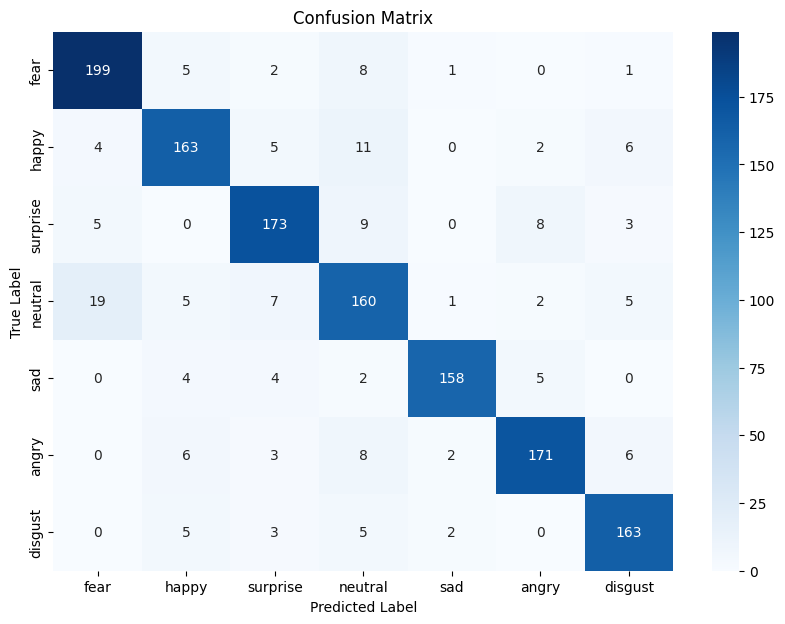

In [106]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from seaborn import heatmap
import matplotlib.pyplot as plt

def evaluate_model(best_model, X_test, y_test):
    """ Evaluate the model on the test set and print the classification report, accuracy, and confusion matrix. """
    # Make predictions
    #y_pred = pipeline.predict(X_test)
    # or using the best model from grid search
    y_pred = best_model.predict(X_test)   
    # Print classification report
    print(classification_report(y_test, y_pred))
    # Print accuracy score
    print("Accuracy:", accuracy_score(y_test, y_pred))

    # Print confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=df['label'].unique(), yticklabels=df['label'].unique())
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

best_model = load('ser_svm_model.joblib')
evaluate_model(best_model, X_test, y_test)


(10039, 62)


/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

       angry       0.86      0.17      0.28      1269
     disgust       0.00      0.00      0.00         2
        fear       0.03      0.19      0.05       107
       happy       0.14      0.33      0.20       656
     neutral       0.42      0.12      0.18      1726
         sad       0.44      0.40      0.42      1250
    surprise       0.07      0.28      0.12       110

    accuracy                           0.23      5120
   macro avg       0.28      0.21      0.18      5120
weighted avg       0.48      0.23      0.26      5120

Accuracy: 0.2298828125


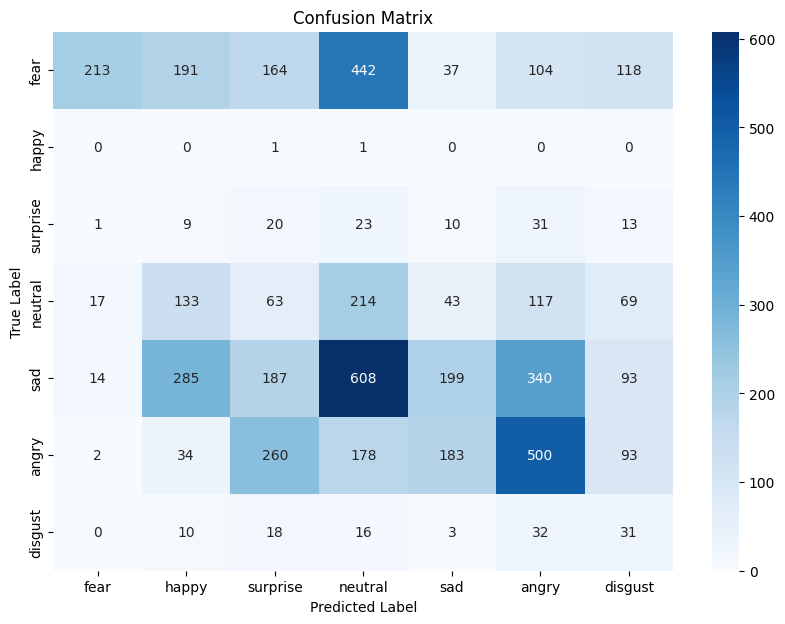

In [107]:
# Load features from disk
data = np.load('./features/iemocap_GeMAPS_features.npz')
print(data['X'].shape)  # Check available arrays in the file
X = data['X']
y = data['y']
# filter bothe to only include allowed emotions
allowed_emotions = ['happy', 'sad', 'angry', 'neutral', 'fear', 'surprise', 'disgust']
mask = np.isin(y, allowed_emotions)
X = X[mask]
y = y[mask]

evaluate_model(best_model, X, y)



In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# perform grid search for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
param_grid = {
    'svm__C': [0.1, 1.0, 10.0],
    'svm__gamma': ['scale', 'auto'],
    'svm__kernel': ['rbf', 'linear'], #['linear', 'rbf'],
    'feature_selection__k': [20, 30, 40] #[10, 20, 30]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Save the best model
best_model = grid_search.best_estimator_
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)
dump(best_model, 'ser_svm_model_iemocap.joblib')

/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(


Best parameters found:  {'feature_selection__k': 40, 'svm__C': 1.0, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
Best cross-validation score:  0.5931918270801886


['ser_svm_model_iemocap.joblib']

[7, 10, 40, 41, 55, 56, 57, 64, 67, 69, 77, 81, 131, 138, 143, 144, 148, 154, 157, 162, 168, 190, 213, 225, 229, 233, 245, 261, 262, 263, 266, 276, 280, 301, 314, 317, 330, 334, 342, 347, 350, 362, 363, 386, 393, 396, 404, 409, 417, 429, 443, 452, 465, 466, 475, 476, 487, 501, 513, 514, 515, 517, 519, 526, 528, 537, 539, 545, 548, 549, 551, 557, 559, 579, 582, 587, 605, 614, 630, 633, 655, 668, 688, 693, 699, 726, 741, 769, 774, 786, 810, 814, 815, 836, 846, 855, 872, 876, 889, 911, 912, 916, 921, 948, 960, 962, 966, 974, 977, 989, 996, 1006, 1007, 1012, 1017, 1018, 1021, 1033, 1035, 1041, 1050, 1063, 1065, 1076, 1118, 1119, 1121, 1131, 1143, 1145, 1162, 1165, 1166, 1168, 1182, 1189, 1195, 1207, 1209, 1222, 1232, 1238, 1241, 1242, 1254, 1264, 1272, 1280, 1302, 1336, 1346, 1353, 1357, 1359, 1360, 1390, 1392, 1397, 1409, 1421, 1431, 1444, 1448, 1468, 1474, 1489, 1502, 1534, 1540, 1554, 1563, 1568, 1570, 1591, 1599, 1610, 1628, 1631, 1633, 1640, 1663, 1665, 1673, 1685, 1687, 1698, 1703, 1

/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: Undefin

              precision    recall  f1-score   support

       angry       0.29      1.00      0.45       127
     disgust       0.00      0.00      0.00        46
        fear       0.00      0.00      0.00        69
       happy       0.00      0.00      0.00        71
     neutral       0.10      0.03      0.04        79
         sad       0.00      0.00      0.00        62

    accuracy                           0.28       454
   macro avg       0.07      0.17      0.08       454
weighted avg       0.10      0.28      0.13       454

Accuracy: 0.2841409691629956


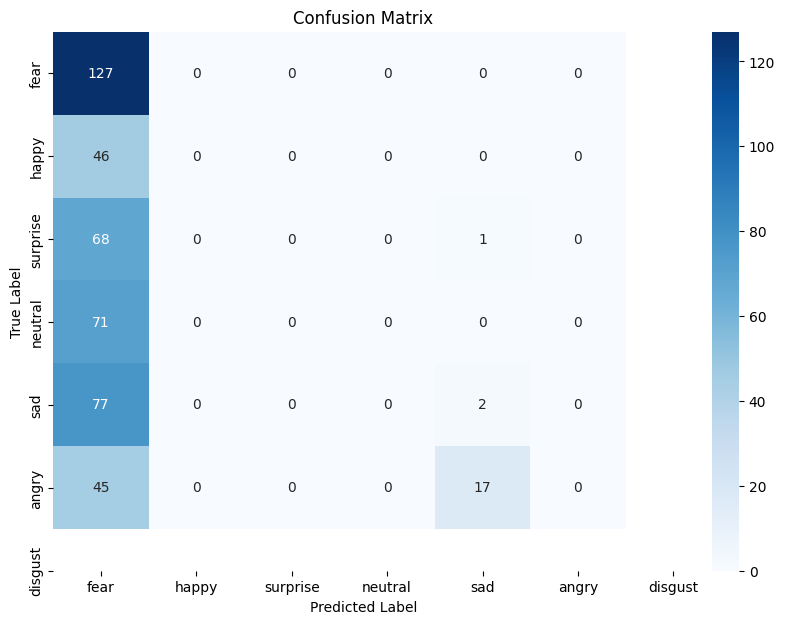

In [113]:
## EMO-DB dataset evaluation
emodb = df[df['dataset'] == 'emodb']
# collect idx of the EMO-DB dataset in the combined features dataframe
emodb_idx = [idx for idx in emodb.index]# if idx in y_test.index]
print(emodb_idx)
feats_emodb = feats_df.iloc[emodb_idx]
emodb_test = df.iloc[emodb_idx]
# Save the features to a csv file
feats_emodb.to_csv('emodb_test_features.csv', index=False)

X1 = feats_emodb
y1 = emodb_test['label']
# Split the dataset into training and testing sets
#X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42, stratify=y1)
# Make predictions
evaluate_model(best_model, X1, y1)

[0, 4, 14, 16, 18, 25, 29, 32, 44, 45, 48, 49, 54, 60, 62, 66, 73, 75, 82, 83, 85, 90, 93, 94, 95, 100, 108, 112, 113, 120, 124, 125, 130, 132, 136, 146, 151, 152, 158, 160, 161, 164, 172, 174, 175, 177, 178, 182, 183, 187, 188, 191, 193, 201, 205, 207, 210, 211, 212, 215, 217, 218, 219, 228, 239, 250, 251, 254, 259, 271, 272, 275, 282, 286, 288, 290, 292, 293, 300, 302, 304, 306, 307, 308, 309, 311, 319, 320, 321, 322, 323, 328, 333, 338, 340, 343, 344, 359, 361, 364, 367, 368, 369, 370, 375, 379, 383, 389, 391, 394, 397, 398, 400, 402, 405, 411, 413, 418, 419, 426, 428, 430, 431, 438, 442, 445, 446, 450, 453, 454, 455, 458, 460, 461, 470, 471, 473, 484, 486, 488, 490, 493, 500, 503, 507, 512, 516, 518, 520, 529, 530, 536, 540, 563, 564, 566, 567, 568, 570, 571, 572, 576, 581, 584, 586, 599, 602, 608, 612, 616, 617, 619, 620, 625, 628, 631, 632, 638, 639, 640, 641, 646, 647, 650, 657, 658, 660, 671, 675, 676, 678, 681, 682, 683, 684, 685, 686, 690, 697, 698, 706, 707, 711, 712, 714, 7

/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: Undefin

              precision    recall  f1-score   support

       angry       0.17      0.99      0.29       192
     disgust       0.00      0.00      0.00       192
        fear       0.00      0.00      0.00       192
       happy       0.00      0.00      0.00       192
     neutral       0.23      0.28      0.26        96
         sad       1.00      0.01      0.01       192
    surprise       0.00      0.00      0.00       192

    accuracy                           0.18      1248
   macro avg       0.20      0.18      0.08      1248
weighted avg       0.20      0.18      0.07      1248

Accuracy: 0.17548076923076922


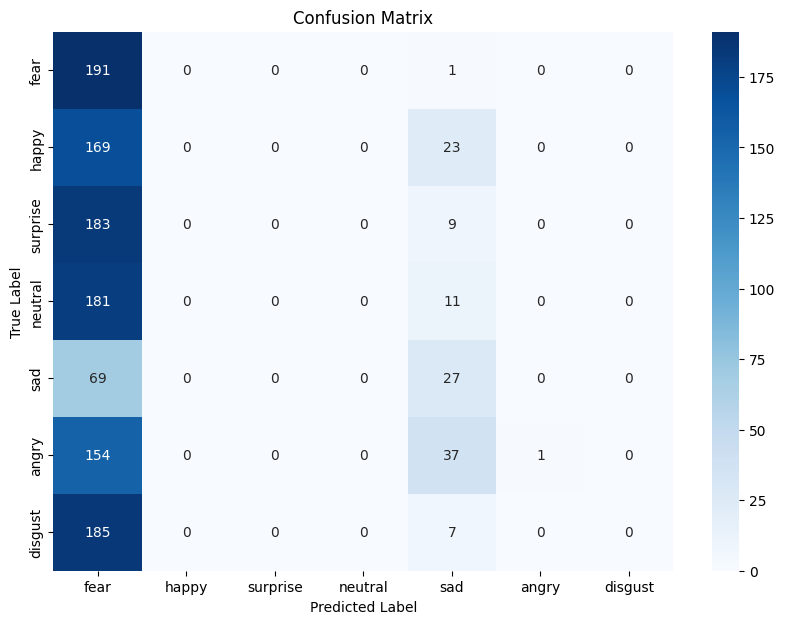

In [114]:
## RAVDESS dataset evaluation
ravdess = df[df['dataset'] == 'ravdess']
# collect idx of the RAVDESS dataset in the combined features dataframe
ravdess_idx = [idx for idx in ravdess.index]# if idx in y_test.index]
print(ravdess_idx)
feats_ravdess = feats_df.iloc[ravdess_idx]
ravdess_test = df.iloc[ravdess_idx]
# Save the features to a csv file
feats_ravdess.to_csv('ravdess_test_features.csv', index=False)  
X2 = feats_ravdess
y2 = ravdess_test['label']
# Make predictions
evaluate_model(best_model, X2, y2)

[1, 2, 3, 5, 6, 8, 9, 11, 12, 13, 15, 17, 19, 20, 21, 22, 23, 24, 26, 27, 28, 30, 31, 33, 34, 35, 36, 37, 38, 39, 42, 43, 46, 47, 50, 51, 52, 53, 58, 59, 61, 63, 65, 68, 70, 71, 72, 74, 76, 78, 79, 80, 84, 86, 87, 88, 89, 91, 92, 96, 97, 98, 99, 101, 102, 103, 104, 105, 106, 107, 109, 110, 111, 114, 115, 116, 117, 118, 119, 121, 122, 123, 126, 127, 128, 129, 133, 134, 135, 137, 139, 140, 141, 142, 145, 147, 149, 150, 153, 155, 156, 159, 163, 165, 166, 167, 169, 170, 171, 173, 176, 179, 180, 181, 184, 185, 186, 189, 192, 194, 195, 196, 197, 198, 199, 200, 202, 203, 204, 206, 208, 209, 214, 216, 220, 221, 222, 223, 224, 226, 227, 230, 231, 232, 234, 235, 236, 237, 238, 240, 241, 242, 243, 244, 246, 247, 248, 249, 252, 253, 255, 256, 257, 258, 260, 264, 265, 267, 268, 269, 270, 273, 274, 277, 278, 279, 281, 283, 284, 285, 287, 289, 291, 294, 295, 296, 297, 298, 299, 303, 305, 310, 312, 313, 315, 316, 318, 324, 325, 326, 327, 329, 331, 332, 335, 336, 337, 339, 341, 345, 346, 348, 349, 351,

/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: Undefin

              precision    recall  f1-score   support

       angry       0.23      0.67      0.35       400
     disgust       0.00      0.00      0.00       400
        fear       0.00      0.00      0.00       400
       happy       0.00      0.00      0.00       400
     neutral       0.21      0.89      0.35       400
         sad       0.00      0.00      0.00       400
    surprise       0.00      0.00      0.00       400

    accuracy                           0.22      2800
   macro avg       0.06      0.22      0.10      2800
weighted avg       0.06      0.22      0.10      2800

Accuracy: 0.2225


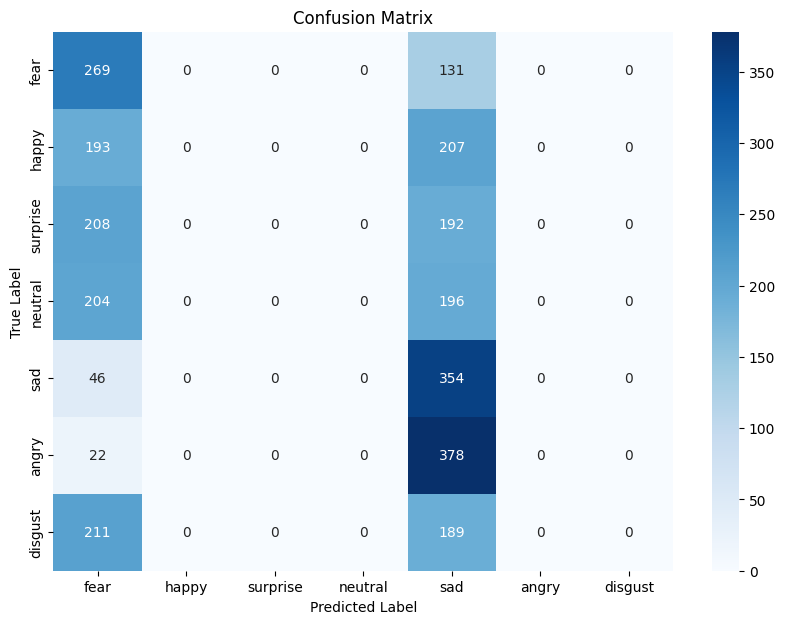

In [115]:
## TESS dataset evaluation
tess = df[df['dataset'] == 'tess']
# collect idx of the TESS dataset in the combined features dataframe
tess_idx = [idx for idx in tess.index]# if idx in y_test.index]
print(tess_idx)
feats_tess = feats_df.iloc[tess_idx]
tess_test = df.iloc[tess_idx]
# Save the features to a csv file
feats_tess.to_csv('tess_test_features.csv', index=False)
X3 = feats_tess
y3 = tess_test['label']
# Make predictions
evaluate_model(best_model, X3, y3)

### Experiment 1.2 – LSTM vs CNN 

Architecture: 

CNN: 1D Conv + GlobalMaxPooling 

LSTM: 1–2 stacked LSTM layers 

Input: Normalized MFCCs (fixed-length padded sequences) 

Metrics: F1-macro, Model size, Inference latency 

Write: We started to build a small CNN with only one layer of convolution, but it was too shallow to learn the characteristics extracted with openSMILE, so we started adding layers and reducing dropout until we started to get reasonable results.


In [116]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, GlobalMaxPooling1D, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# CNN: 1D + GlobalMaxPooling1D
# Define the model
def create_cnn_model(input_shape, num_classes):
    
    model = Sequential()
    
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(Dropout(0.1))

    model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(Dropout(0.1))

    model.add(GlobalMaxPooling1D())
    
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.1))

    model.add(Dense(num_classes, activation='softmax'))

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0003)  # menor lr para mais estabilidade
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model
# Train on X_train, y_train
cnn_model = create_cnn_model((X_train.shape[1], 1), len(df['label'].unique()))
# add early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)
# add a callback to save the best model
checkpoint = tf.keras.callbacks.ModelCheckpoint('ser_cnn_model.h5', monitor='val_loss', save_best_only=True, mode='min')
# add the checkpoint to the callbacks
callbacks = [early_stopping, checkpoint]
# learning rate scheduler
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 0.9 ** epoch, verbose=1)
callbacks.append(lr_scheduler)
# define learning rate as constant
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_reshaped = X_train_scaled.reshape(-1, X_train.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(-1, X_test.shape[1], 1)
# train the CNN model
cnn_model.fit(X_train_reshaped, y_train_encoded, epochs=1000, batch_size=16, validation_split=0.2, callbacks=callbacks)



Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/1000
180/180 [==============================] - 4s 12ms/step - loss: 1.7621 - accuracy: 0.3910 - val_loss: 1.7920 - val_accuracy: 0.3710 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0009000000000000001.
Epoch 2/1000
  1/180 [..............................] - ETA: 1s - loss: 1.3996 - accuracy: 0.3750

/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


180/180 [==============================] - 2s 8ms/step - loss: 1.3632 - accuracy: 0.4695 - val_loss: 1.5110 - val_accuracy: 0.4909 - lr: 9.0000e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.0008100000000000001.
Epoch 3/1000
180/180 [==============================] - 2s 8ms/step - loss: 1.3160 - accuracy: 0.4820 - val_loss: 1.3463 - val_accuracy: 0.4965 - lr: 8.1000e-04

Epoch 4: LearningRateScheduler setting learning rate to 0.0007290000000000002.
Epoch 4/1000
180/180 [==============================] - 2s 9ms/step - loss: 1.2884 - accuracy: 0.4813 - val_loss: 1.3067 - val_accuracy: 0.4909 - lr: 7.2900e-04

Epoch 5: LearningRateScheduler setting learning rate to 0.0006561000000000001.
Epoch 5/1000
180/180 [==============================] - 2s 10ms/step - loss: 1.2647 - accuracy: 0.5037 - val_loss: 1.3219 - val_accuracy: 0.4463 - lr: 6.5610e-04

Epoch 6: LearningRateScheduler setting learning rate to 0.00059049.
Epoch 6/1000
180/180 [==============================] - 2s 

In [71]:
# Evaluate the CNN model
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_reshaped, y_test_encoded)
print(f"CNN Test Loss: {cnn_loss}, Test Accuracy: {cnn_accuracy}")
# Save the CNN model
cnn_model.save('ser_cnn_model.h5')
# Save end to end model (with feature extraction, scaler, and CNN)
import joblib
end_to_end_model = {
    'feature_extractor': smile,
    'scaler': scaler,
    'cnn_model': cnn_model,
    'label_encoder': le
}
joblib.dump(end_to_end_model, 'ser_end_to_end_model.joblib')


43/43 [==============================] - 0s 3ms/step - loss: 0.7838 - accuracy: 0.7269
CNN Test Loss: 0.7838073372840881, Test Accuracy: 0.7268689870834351


['ser_end_to_end_model.joblib']

In [74]:

X1_test_scaled = scaler.transform(X1)
X1_test_reshaped = X1_test_scaled.reshape(-1, X1.shape[1], 1)
y1 = le.transform(y1)  # Encode labels for EMO-DB
X2_test_scaled = scaler.transform(X2)
X2_test_reshaped = X2_test_scaled.reshape(-1, X2.shape[1], 1)
y2 = le.transform(y2)  # Encode labels for RAVDESS
X3_test_scaled = scaler.transform(X3)
X3_test_reshaped = X3_test_scaled.reshape(-1, X3.shape[1], 1)
y3 = le.transform(y3)  # Encode labels for TESS

ValueError: y contains previously unseen labels: 3

In [117]:

# Evaluate the CNN model on EMO-DB dataset
cnn_emodb_loss, cnn_emodb_accuracy = cnn_model.evaluate(feats_emodb.values.reshape(feats_emodb.shape[0], feats_emodb.shape[1], 1), y1)
print(f"CNN EMO-DB Test Loss: {cnn_emodb_loss}, Test Accuracy: {cnn_emodb_accuracy}")
# Evaluate the CNN model on RAVDESS dataset
cnn_ravdess_loss, cnn_ravdess_accuracy = cnn_model.evaluate(feats_ravdess.values.reshape(feats_ravdess.shape[0], feats_ravdess.shape[1], 1), y2)
print(f"CNN RAVDESS Test Loss: {cnn_ravdess_loss}, Test Accuracy: {cnn_ravdess_accuracy}")
# Evaluate the CNN model on TESS dataset
cnn_tess_loss, cnn_tess_accuracy = cnn_model.evaluate(feats_tess.values.reshape(feats_tess.shape[0], feats_tess.shape[1], 1), y3)
print(f"CNN TESS Test Loss: {cnn_tess_loss}, Test Accuracy: {cnn_tess_accuracy}")

2025-07-14 14:55:58.066750: W tensorflow/core/framework/op_kernel.cc:1805] OP_REQUIRES failed at cast_op.cc:121 : UNIMPLEMENTED: Cast string to float is not supported


UnimplementedError: Graph execution error:

Detected at node 'Cast_1' defined at (most recent call last):
    File "/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/ipykernel_launcher.py", line 18, in <module>
      app.launch_new_instance()
    File "/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/traitlets/config/application.py", line 1075, in launch_instance
      app.start()
    File "/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/ipykernel/kernelapp.py", line 739, in start
      self.io_loop.start()
    File "/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/tornado/platform/asyncio.py", line 205, in start
      self.asyncio_loop.run_forever()
    File "/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/asyncio/base_events.py", line 570, in run_forever
      self._run_once()
    File "/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/asyncio/base_events.py", line 1859, in _run_once
      handle._run()
    File "/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/asyncio/events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue
      await self.process_one()
    File "/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 534, in process_one
      await dispatch(*args)
    File "/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell
      await result
    File "/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 362, in execute_request
      await super().execute_request(stream, ident, parent)
    File "/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 778, in execute_request
      reply_content = await reply_content
    File "/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 449, in do_execute
      res = shell.run_cell(
    File "/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/ipykernel/zmqshell.py", line 549, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3006, in run_cell
      result = self._run_cell(
    File "/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3061, in _run_cell
      result = runner(coro)
    File "/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3266, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3445, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3505, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/0s/lm29041s6hv5pq_lc3jblq540000gn/T/ipykernel_1815/3257856513.py", line 2, in <module>
      cnn_emodb_loss, cnn_emodb_accuracy = cnn_model.evaluate(feats_emodb.values.reshape(feats_emodb.shape[0], feats_emodb.shape[1], 1), y1)
    File "/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/keras/src/engine/training.py", line 2200, in evaluate
      logs = test_function_runner.run_step(
    File "/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/keras/src/engine/training.py", line 4000, in run_step
      tmp_logs = self._function(dataset_or_iterator)
    File "/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/keras/src/engine/training.py", line 1972, in test_function
      return step_function(self, iterator)
    File "/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/keras/src/engine/training.py", line 1956, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/keras/src/engine/training.py", line 1944, in run_step
      outputs = model.test_step(data)
    File "/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/keras/src/engine/training.py", line 1853, in test_step
      return self.compute_metrics(x, y, y_pred, sample_weight)
    File "/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/keras/src/engine/training.py", line 1179, in compute_metrics
      self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/keras/src/engine/compile_utils.py", line 605, in update_state
      metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/keras/src/utils/metrics_utils.py", line 77, in decorated
      update_op = update_state_fn(*args, **kwargs)
    File "/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/keras/src/metrics/base_metric.py", line 140, in update_state_fn
      return ag_update_state(*args, **kwargs)
    File "/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/keras/src/metrics/base_metric.py", line 708, in update_state
      y_true = tf.cast(y_true, self._dtype)
Node: 'Cast_1'
Cast string to float is not supported
	 [[{{node Cast_1}}]] [Op:__inference_test_function_1857057]

CNN + LSTM

- Short-term GeMAPS (LLDs only)
- Fixed-length padding/truncation
- CNN input-ready formatting
- Feature scaling (per-feature)

In [ ]:
from tensorflow.keras.layers import LSTM, TimeDistributed, BatchNormalization

def create_cnn_lstm_model(input_shape, num_classes):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(LSTM(64, return_sequences=False))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))

    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer=tf.keras.optimizers.Adam(0.0003), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Train on X_train, y_train
cnn_model = create_cnn_lstm_model((X_train.shape[1], 1), len(df['label'].unique()))
# add early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)
# add a callback to save the best model
checkpoint = tf.keras.callbacks.ModelCheckpoint('ser_cnn_model.h5', monitor='val_loss', save_best_only=True, mode='min')
# add the checkpoint to the callbacks
callbacks = [early_stopping, checkpoint]
# learning rate scheduler
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 0.9 ** epoch, verbose=1)
callbacks.append(lr_scheduler)
# define learning rate as constant
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_reshaped = X_train_scaled.reshape(-1, X_train.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(-1, X_test.shape[1], 1)
# train the CNN model
cnn_model.fit(X_train_reshaped, y_train_encoded, epochs=1000, batch_size=16, validation_split=0.2, callbacks=callbacks)


Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/1000
158/158 [==============================] - 9s 31ms/step - loss: 1.7635 - accuracy: 0.2948 - val_loss: 2.0425 - val_accuracy: 0.1854 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0009000000000000001.
Epoch 2/1000
  5/158 [..............................] - ETA: 4s - loss: 1.5971 - accuracy: 0.3250

/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


158/158 [==============================] - 4s 27ms/step - loss: 1.5096 - accuracy: 0.4119 - val_loss: 1.7963 - val_accuracy: 0.2552 - lr: 9.0000e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.0008100000000000001.
Epoch 3/1000
158/158 [==============================] - 4s 26ms/step - loss: 1.3791 - accuracy: 0.4639 - val_loss: 1.3433 - val_accuracy: 0.4548 - lr: 8.1000e-04

Epoch 4: LearningRateScheduler setting learning rate to 0.0007290000000000002.
Epoch 4/1000
158/158 [==============================] - 4s 27ms/step - loss: 1.3078 - accuracy: 0.4968 - val_loss: 1.2201 - val_accuracy: 0.5388 - lr: 7.2900e-04

Epoch 5: LearningRateScheduler setting learning rate to 0.0006561000000000001.
Epoch 5/1000
158/158 [==============================] - 4s 27ms/step - loss: 1.2770 - accuracy: 0.5143 - val_loss: 1.1496 - val_accuracy: 0.5468 - lr: 6.5610e-04

Epoch 6: LearningRateScheduler setting learning rate to 0.00059049.
Epoch 6/1000
158/158 [==============================] - 

In [81]:
import numpy as np

def pad_or_truncate(features, max_frames=200):
    num_frames, num_features = features.shape
    if num_frames >= max_frames:
        return features[:max_frames, :]
    else:
        padding = np.zeros((max_frames - num_frames, num_features))
        return np.vstack((features, padding))


from sklearn.preprocessing import StandardScaler

def standardize_features(X):
    num_samples, num_frames, num_features = X.shape
    X_reshaped = X.reshape(-1, num_features)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_reshaped)
    return X_scaled.reshape(num_samples, num_frames, num_features), scaler


from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, Dropout, GlobalMaxPooling1D, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

def create_cnn_model(input_shape, num_classes):
    model = Sequential()
    model.add(Conv1D(64, 3, activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Conv1D(128, 3, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(GlobalMaxPooling1D())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer=tf.keras.optimizers.Adam(0.0003),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


callbacks = [
    EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True),
    ModelCheckpoint('cnn_gemaps_model.h5', monitor='val_loss', save_best_only=True)
]
max_frames = 2000
num_features = feats_df.shape[1]
#X_train_padded = np.array([pad_or_truncate(feats) for feats in feats_df.values])
X_train_scaled = scaler.transform(X_train)
X_train_reshaped = X_train_scaled.reshape(-1, max_frames, num_features)
cnn_model = create_cnn_model(input_shape=(max_frames, num_features), num_classes=len(np.unique(y_encoded)))
cnn_model.fit(X_train, y_train_encoded, epochs=200, batch_size=16,
              validation_split=0.2, callbacks=callbacks)

# Evaluate the CNN model
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test, y_test_encoded)
print(f"CNN Test Loss: {cnn_loss}, Test Accuracy: {cnn_accuracy}")

ValueError: cannot reshape array of size 195362 into shape (2000,62)

Absolutely, Sofia — this is **core knowledge** for emotion recognition using machine learning. Let's break it down step by step:

---

## 🔄 Sequence vs. Non-Sequence Models in SER

### 🎯 What's the key difference?

It’s about **how the model treats time** and **input length**:

| Type                    | Handles Time/Order? | Input Length       | Examples                    |
| ----------------------- | ------------------- | ------------------ | --------------------------- |
| **Non-Sequence Models** | ❌ No                | Fixed-length only  | SVM, MLP, Random Forest     |
| **Sequence Models**     | ✅ Yes               | Variable-length OK | RNN, LSTM, GRU, Transformer |

---

## 🧠 Non-Sequence Models (e.g., SVM, MLP)

### ❌ Cons:

* Time dynamics (e.g., rising pitch, emotion curve) are lost.
* Doesn't work directly on variable-length sequences.

### ✅ Pros:

* Lightweight
* Good for fast benchmarking
* Simpler training

---

## 🧠 Sequence Models (RNN, LSTM, Transformer, CNN1D)

These accept **temporal sequences** — perfect for **frame-wise features**.

### ✅ Input:

A matrix `X` of shape:

```
[T, F]  
T = number of time frames (varies)
F = number of features per frame (e.g., 88 in eGeMAPS)
```

E.g., `X.shape = (240, 88)` for a 2.4s audio with 10ms steps.

### ✅ Models:

| Model           | Description                                                 |
| --------------- | ----------------------------------------------------------- |
| **RNN**         | Learns from time steps one-by-one                           |
| **LSTM/GRU**    | Better than vanilla RNNs — captures long-term dependencies  |
| **Transformer** | Learns full sequence context in parallel (e.g., BERT-style) |
| **1D CNN**      | Learns local temporal patterns (e.g., pitch rise)           |

---

### ✅ Step 2: Prepare sequences

* Each sample (utterance) is now a `T x F` matrix.
* Store them in a list: `[sample1, sample2, ..., sampleN]`
* Use **padding** and **masking** for batching.



### ✅ Step 3: Define and train your sequence model



---

## 🤖 Transformers instead of LSTM?

Yes — for variable-length input, `TransformerEncoder` or `wav2vec2` can also work.
But:

* Needs position encoding
* More compute-heavy

---

## ⚡ Recap: When to Use Each?

| Goal                               | Suggested Approach                                              |
| ---------------------------------- | --------------------------------------------------------------- |
| Fast baseline / light model        | SVM with OpenSMILE functionals                                  |
| Capture emotion dynamics over time | LSTM, GRU, Transformer on LLDs                                  |
| Raw audio                          | CNN or wav2vec2                                                 |
| Multimodal fusion                  | Concatenate embeddings from each modality before classification |

---

## 🧪 Pro Tip: Hybrid

You can also:

* Extract LLDs → pass to LSTM
* Concatenate with embeddings from deep models
* Fuse in multimodal setup

---

Would you like help setting up a **PyTorch pipeline** for LSTM-based SER using OpenSMILE LLDs? I can write a working example for you.


In [27]:
import opensmile
from sklearn.preprocessing import StandardScaler
# Load OpenSMILE
smile = opensmile.Smile(
    #feature_set=opensmile.FeatureSet.GeMAPSv01b,
    #feature_level=opensmile.FeatureLevel.LowLevelDescriptors,
    feature_set=opensmile.FeatureSet.ComParE_2016,
    feature_level=opensmile.FeatureLevel.LowLevelDescriptors_Deltas,
    verbose=True
)

emodb_features = smile.process_files(emodb["filename"])


  0%|                         [00:00<?] Process 454 files                                           

In [29]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
import torch
import torch.nn as nn
from torch.nn.utils.rnn import pad_sequence
from sklearn.model_selection import train_test_split

# Step 1: Encode emotions to integers
emotions = emodb["label"].tolist()
label_encoder = LabelEncoder()
y_all = label_encoder.fit_transform(emotions)

# Step 2: Map file to label
filename_to_label = dict(zip(emodb["filename"], y_all))

# Step 3: Build (X, y) sequences
X_all = []
y_all = []

for filename in emodb["filename"]:
    feats = emodb_features.loc[filename]  # shape: (T, F)
    X_all.append(torch.tensor(feats.values, dtype=torch.float32))  # keep as sequence
    y_all.append(filename_to_label[filename])

# Step 5: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.3, random_state=42, stratify=y_all)
# Flatten training sequences to (total_frames, num_features)
X_train_flat = torch.cat(X_train, dim=0).numpy()  # shape: (sum(T), F)
scaler = StandardScaler()
scaler.fit(X_train_flat)
# Standardize the training sequences
X_train = [torch.tensor(scaler.transform(feats.numpy()), dtype=torch.float32) for feats in X_train]
X_test = [torch.tensor(scaler.transform(feats.numpy()), dtype=torch.float32) for feats in X_test]
# Pad sequences to make a batch
X_train_padded = pad_sequence(X_train, batch_first=True)  # shape: (N, max_T, F)
y_train_tensor = torch.tensor(y_train)
X_test_padded = pad_sequence(X_test, batch_first=True)
y_test_tensor = torch.tensor(y_test)

#sequences = [torch.tensor(sample) for sample in X_train]  # shape: (T, F)
#padded = pad_sequence(sequences, batch_first=True)  # shape: (batch, max_T, F)

class EmotionLSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_classes):
        super().__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):
        _, (hn, _) = self.lstm(x)
        return self.fc(hn[-1])  # Use last hidden state

model = EmotionLSTM(input_dim=88, hidden_dim=64, num_classes=7)
logits = model(X_train_padded)


In [30]:
from torch.utils.data import TensorDataset, DataLoader
from tqdm import tqdm

train_dataset = TensorDataset(X_train_padded, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

model = EmotionLSTM(input_dim=88, hidden_dim=64, num_classes=len(label_encoder.classes_))
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

for epoch in tqdm(range(100)):
    for batch_X, batch_y in train_loader:
        logits = model(batch_X)
        loss = criterion(logits, batch_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

100%|██████████| 100/100 [19:00<00:00, 11.40s/it]


### Scaled

Accuracy: 0.2773722627737226
Classification Report:
               precision    recall  f1-score   support

       angry       0.28      1.00      0.43        38
     disgust       0.00      0.00      0.00        14
        fear       0.00      0.00      0.00        21
       happy       0.00      0.00      0.00        21
     neutral       0.00      0.00      0.00        24
         sad       0.00      0.00      0.00        19

    accuracy                           0.28       137
   macro avg       0.05      0.17      0.07       137
weighted avg       0.08      0.28      0.12       137



/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

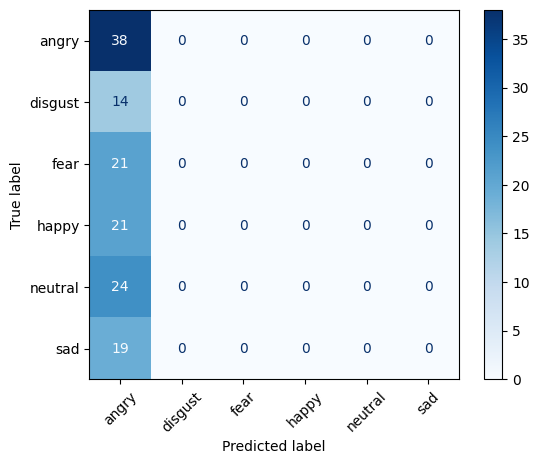

In [32]:
from sklearn.metrics import accuracy_score, classification_report
import torch.nn.functional as F
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

test_dataset = TensorDataset(X_test_padded, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)


model.eval()  # 🔒 sets dropout, batchnorm etc. to eval mode
all_preds = []
all_labels = []

with torch.no_grad():  # 🚫 disables gradient tracking
    for batch_X, batch_y in test_loader:
        logits = model(batch_X)
        preds = torch.argmax(F.softmax(logits, dim=1), dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(batch_y.cpu().numpy())

print("Accuracy:", accuracy_score(all_labels, all_preds))
print("Classification Report:\n", classification_report(all_labels, all_preds, target_names=label_encoder.classes_))

cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.show()


### Not scaled

Accuracy: 0.2846715328467153
Classification Report:
               precision    recall  f1-score   support

       angry       0.28      1.00      0.44        38
     disgust       0.00      0.00      0.00        14
        fear       0.00      0.00      0.00        21
       happy       0.00      0.00      0.00        21
     neutral       0.00      0.00      0.00        24
         sad       1.00      0.05      0.10        19

    accuracy                           0.28       137
   macro avg       0.21      0.18      0.09       137
weighted avg       0.22      0.28      0.14       137



/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

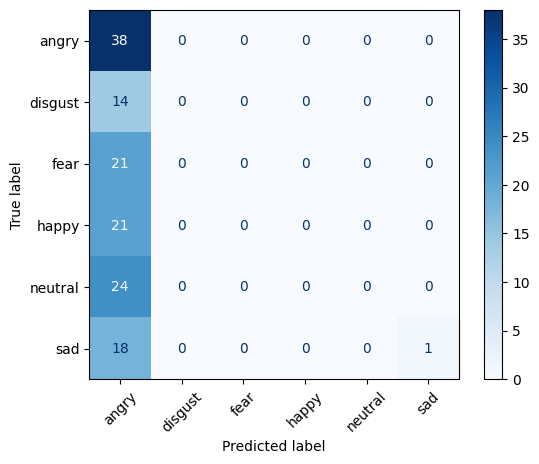

In [9]:
from sklearn.metrics import accuracy_score, classification_report
import torch.nn.functional as F
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

test_dataset = TensorDataset(X_test_padded, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)


model.eval()  # 🔒 sets dropout, batchnorm etc. to eval mode
all_preds = []
all_labels = []

with torch.no_grad():  # 🚫 disables gradient tracking
    for batch_X, batch_y in test_loader:
        logits = model(batch_X)
        preds = torch.argmax(F.softmax(logits, dim=1), dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(batch_y.cpu().numpy())

print("Accuracy:", accuracy_score(all_labels, all_preds))
print("Classification Report:\n", classification_report(all_labels, all_preds, target_names=label_encoder.classes_))

cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.show()


### Experiment 1.3 – Apply SOTA or hybrid 

Reference Methods: Implement or replicate: 

[Zhao et al., 2019] CNN+Attention 

[Neumann & Vu, 2020] BiLSTM + Attention 

Compare to baseline: SVM + GeMAPS 

Dataset Augmentation: Try data balancing (SMOTE or oversampling) 